In [1]:
### from Column 'J' to Column '' in updated dataset ###

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [15]:
# Add path of updated CSV
df = pd.read_csv('D:\\IIITD\\sem7\\DSc\\Dsc_Project\\Data_Science_Project\\dataset\\updated_dataset.csv')


In [17]:
col_list=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']

for name in col_list:
    missing_values_count = df[name].isnull().sum()
    print(missing_values_count)
    
    rows_before = df.shape[0]
    print("Before : ",rows_before)
    
    df.dropna(subset=[name], inplace=True)

    
    rows_after = df.shape[0]
    print("After : ",rows_after)


0
Before :  101766
After :  101766
0
Before :  101766
After :  101766
0
Before :  101766
After :  101766
0
Before :  101766
After :  101766
0
Before :  101766
After :  101766
0
Before :  101766
After :  101766
0
Before :  101766
After :  101766


In [18]:
df = pd.read_csv('D:\\IIITD\\sem7\\DSc\\Dsc_Project\\Data_Science_Project\\dataset\\updated_dataset.csv', usecols=col_list)
summary_df = pd.DataFrame(columns=['Column Name', 'Mean', 'Median', 'Mode'])


for column_name in df.columns:
    mean = df[column_name].mean()
    median = df[column_name].median()
    # min_occurrences = df[column_name].value_counts().min()
    most_common_value = df[column_name].mode().values[0]
    most_common_value_frequency = df[column_name].value_counts().max()
    
    # Calculate the least common value and its frequency
    least_common_value = df[column_name].value_counts().idxmin()
    least_common_value_frequency = df[column_name].value_counts().min()
    
    std_deviation = df[column_name].std()
    variance = df[column_name].var()
    
    # Append the results to the summary DataFrame
    summary_df = summary_df.append({'Column Name': column_name, 'Mean': mean, 'Median': median,
                                    'Most Common Value': most_common_value, 'Most Common Value Frequency': most_common_value_frequency,
                                    'Least Common Value': least_common_value, 'Least Common Value Frequency': least_common_value_frequency,
                                    'Standard Deviation': std_deviation, 'Variance': variance},
                                   ignore_index=True)
    # summary_df = summary_df.append({'Column Name': column_name, 'Mean': mean, 'Median': median, 'Min Occurrences': min_occurrences}, ignore_index=True)

# Write the summary DataFrame to a CSV file
summary_df.to_csv('Analysis(Column_I_to_O).csv', index=False)


C:\Users\Sejal\AppData\Local\Temp\ipykernel_28764\154776729.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column Name': column_name, 'Mean': mean, 'Median': median,
C:\Users\Sejal\AppData\Local\Temp\ipykernel_28764\154776729.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column Name': column_name, 'Mean': mean, 'Median': median,
C:\Users\Sejal\AppData\Local\Temp\ipykernel_28764\154776729.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Column Name': column_name, 'Mean': mean, 'Median': median,
C:\Users\Sejal\AppData\Local\Temp\ipykernel_28764\154776729.py:20: FutureWarning: The frame.append method is deprecate

In [19]:
############# Remove outliers ######################

# Specify the column containing the data with outliers
col_list=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']




for name in col_list:
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rows_before = df.shape[0]
    print(name)
    print("Before : ",rows_before)


    if(df[(df[name] <= lower_bound) & (df[name] >= upper_bound)]):
        df.dropna(subset=[name], inplace=True)
    
    # data = df[(df[name] >= lower_bound) & (df[name] <= upper_bound)]
    rows_after = df.shape[0]
    print("After : ",rows_after)


# Remove outliers from the column


# Save the cleaned data back to a CSV file
# data.to_csv('data_after_removing outliers.csv', index=False)


time_in_hospital
Before :  100244


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

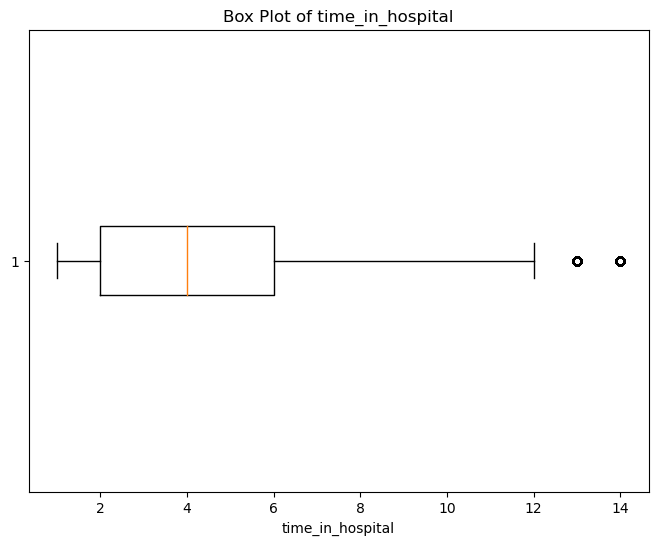

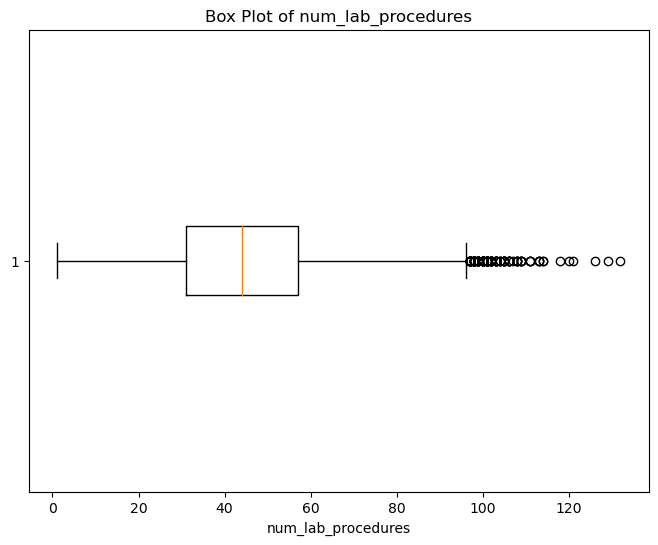

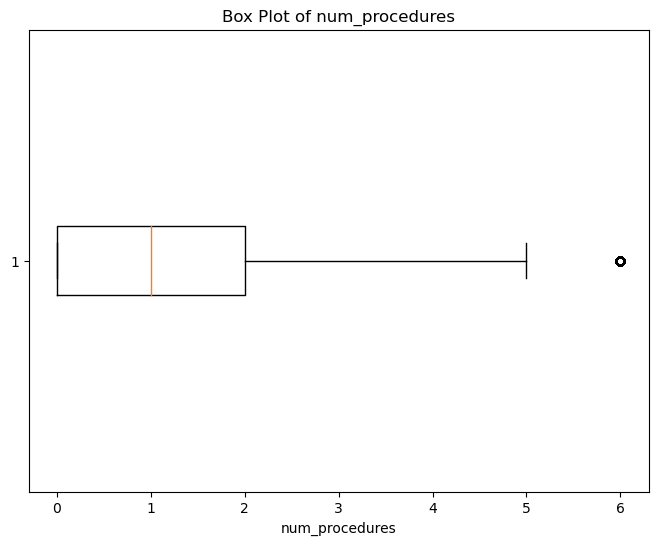

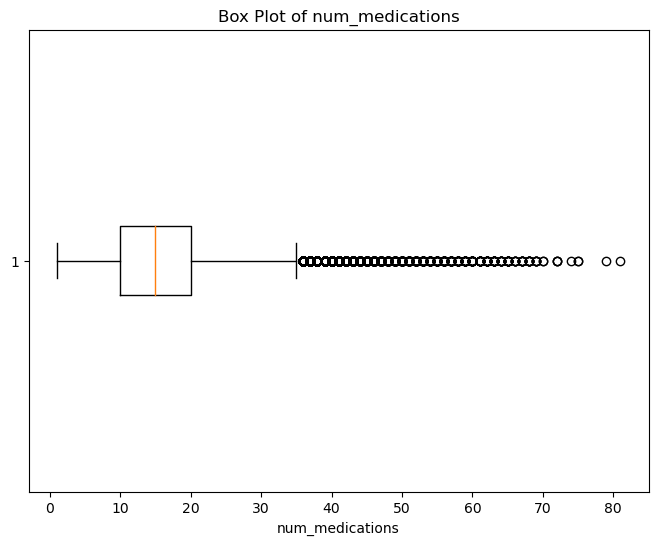

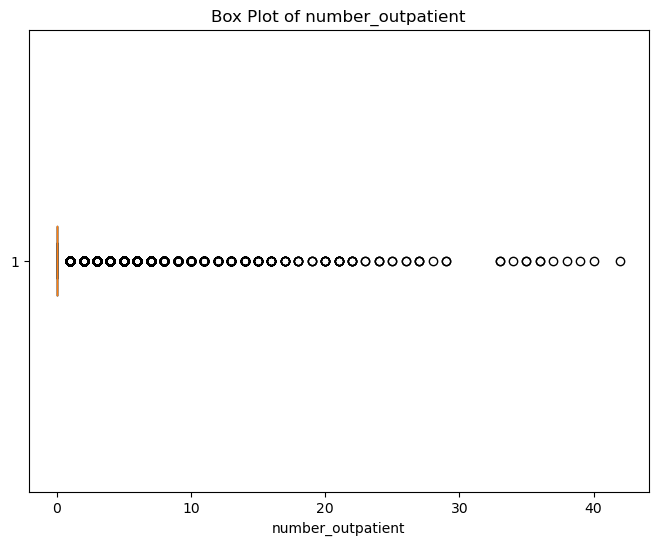

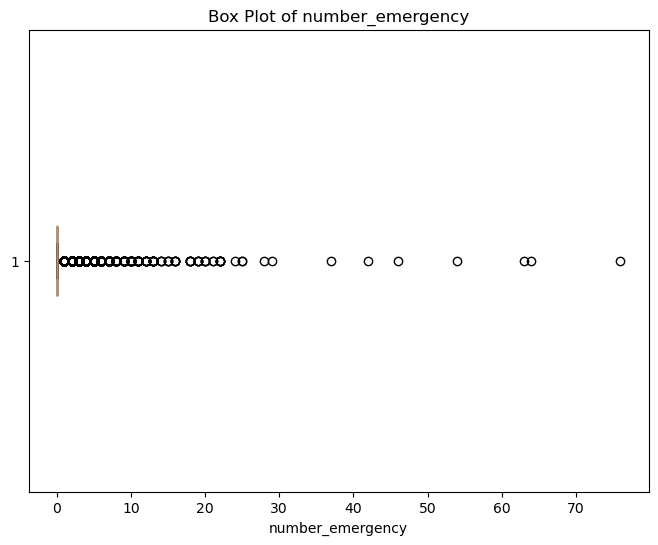

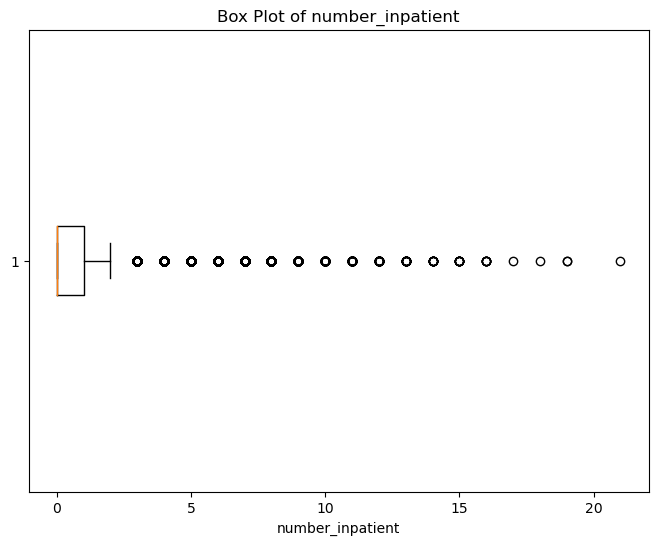

In [10]:
############ BOX PLOT ####################


# column_name = col_list[0]

# Create a box plot
col_list=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']

for col_name in col_list:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.boxplot(df[col_name], vert=False)  # vert=False for a horizontal box plot
    plt.title('Box Plot of ' + col_name)
    plt.xlabel(col_name)
    plt.savefig(f'{col_name}_boxplot.png')
plt.show()
